 # Expand rules
To be used in conjunction with examine model.

1. builds out rule for a reaction identified
2. re-runs rmg
3. recreates input files for peuqse


## 1. build out rule for identified reaction


In [1]:
import os
import sys
import numpy as np
import pandas as pd
import itertools
import yaml
import pickle
import multiprocessing
import time 
import subprocess

repo_dir = os.path.dirname(os.path.dirname(os.path.abspath("")))


In [65]:
from rmgpy.quantity import Energy
binding_energies = {
            'H': Energy(-2.75368,'eV/molecule'),
            'C': Energy(-4.02516,'eV/molecule'),
            'N': Energy(-4.63225,'eV/molecule'),
            'O': Energy(-3.81153,'eV/molecule'),
        }

In [66]:
from rmgpy import settings
from rmgpy.data.rmg import RMGDatabase

# import the metal binding energies

# select surface families
families='surface'
#set libraries to load reactions from; set to None to load all libraries
libraries = None

thermo_libraries = ['primaryThermoLibrary', 'surfaceThermoPt111']
database = RMGDatabase()
database.load(
    path = settings['database.directory'],
    thermo_libraries = thermo_libraries,  
    kinetics_families = families,
    reaction_libraries = libraries,
    kinetics_depositories = ['training'],
)
for family in database.kinetics.families.values():
        if not family.auto_generated:
            family.add_rules_from_training(thermo_database=database.thermo)
            family.fill_rules_by_averaging_up(verbose=False)



In [67]:
database.thermo.set_binding_energies(binding_energies)

In [105]:
from rmgpy.species import Species

reactant1 = Species().from_smiles('CO-[*]')
reactant1.generate_resonance_structures()
reactant1.thermo = database.thermo.get_thermo_data_for_surface_species(reactant1)
reactant2 = Species().from_smiles('C[*]')
reactant2.generate_resonance_structures()
reactant2.thermo = database.thermo.get_thermo_data_for_surface_species(reactant2)
# product1 = Species().from_smiles('O[*]')
# product2 = Species().from_smiles('[*]')
reactants = [reactant1, reactant2]
products = []

reaction_list = database.kinetics.generate_reactions(
    reactants, only_families=False, resonance=False)

In [106]:
reaction.template

['Combined', 'VacantSite']

In [110]:
reaction.reactants[0].thermo = database.thermo.get_thermo_data_for_surface_species(reaction.reactants[0])
reaction.reactants[1].thermo = database.thermo.get_thermo_data_for_surface_species(reaction.reactants[1])

DatabaseError: Can't estimate thermo of vacant site. Should be in library (and should be 0).

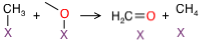

Exception: Unable to calculate enthalpy for species '': no thermo or statmech data available.

106100.00000000003


Exception ignored in: 'rmgpy.reaction.Reaction.get_enthalpy_of_reaction'
Traceback (most recent call last):
  File "rmgpy/species.py", line 523, in rmgpy.species.Species.get_enthalpy
Exception: Unable to calculate enthalpy for species '': no thermo or statmech data available.


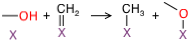

Exception: Unable to calculate enthalpy for species '': no thermo or statmech data available.

121703.14564536512


Exception ignored in: 'rmgpy.reaction.Reaction.get_enthalpy_of_reaction'
Traceback (most recent call last):
  File "rmgpy/species.py", line 523, in rmgpy.species.Species.get_enthalpy
Exception: Unable to calculate enthalpy for species '': no thermo or statmech data available.


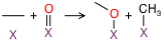

Exception: Unable to calculate enthalpy for species '': no thermo or statmech data available.

92700.0


Exception ignored in: 'rmgpy.reaction.Reaction.get_enthalpy_of_reaction'
Traceback (most recent call last):
  File "rmgpy/species.py", line 523, in rmgpy.species.Species.get_enthalpy
Exception: Unable to calculate enthalpy for species '': no thermo or statmech data available.


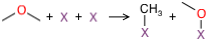

Exception: Unable to calculate enthalpy for species '': no thermo or statmech data available.

5000.0


Exception ignored in: 'rmgpy.reaction.Reaction.get_enthalpy_of_reaction'
Traceback (most recent call last):
  File "rmgpy/species.py", line 523, in rmgpy.species.Species.get_enthalpy
Exception: Unable to calculate enthalpy for species '': no thermo or statmech data available.


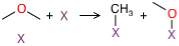

Exception: Unable to calculate enthalpy for species '': no thermo or statmech data available.

157271.10805120406


Exception ignored in: 'rmgpy.reaction.Reaction.get_enthalpy_of_reaction'
Traceback (most recent call last):
  File "rmgpy/species.py", line 523, in rmgpy.species.Species.get_enthalpy
Exception: Unable to calculate enthalpy for species '': no thermo or statmech data available.


In [95]:
from rmgpy.rmg.model import get_family_library_object

binding_energies = {
            'H': Energy(-2.75368,'eV/molecule'),
            'C': Energy(-2.02516,'eV/molecule'),
            'N': Energy(-4.63225,'eV/molecule'),
            'O': Energy(-3.81153,'eV/molecule'),
        }
database.thermo.set_binding_energies(binding_energies)

for reaction in reaction_list: 
    display(reaction)
    # kin = database.kinetics.get_kinetics_for_template(reaction, degeneracy=1, method='rate rules')
    family = reaction.family

    # Get the kinetics for the reaction
    # kinetics, entry = database.kinetics.families[family].get_kinetics_for_template(reaction, reaction.template, reaction.degeneracy, method='rate rules')
    kinetics, source, entry, is_forward = database.kinetics.families[family].get_kinetics(reaction, template_labels=reaction.template,
                                                                degeneracy=reaction.degeneracy,
                                                                estimator="rate rules",
                                                                return_all_kinetics=False)
    
    print(kinetics.get_activation_energy(reaction.get_enthalpy_of_reaction(298)))

In [77]:
binding_energies = {
            'H': Energy(-2.75368,'eV/molecule'),
            'C': Energy(-7.02516,'eV/molecule'),
            'N': Energy(-4.63225,'eV/molecule'),
            'O': Energy(-3.81153,'eV/molecule'),
        }
database.thermo.set_binding_energies(binding_energies)

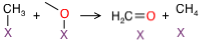

SurfaceArrheniusBEP(A=(7.124e+17,'m^2/(mol*s)'), n=0, alpha=0, E0=(1.63,'eV/molecule'), Tmin=(298,'K'), Tmax=(2000,'K'), comment="""From training reaction 34 used for Combined;VacantSite
Exact match found for rate rule [Combined;VacantSite]
Euclidian distance = 0
Multiplied by reaction path degeneracy 4.0
family: Surface_Dissociation_vdW""")


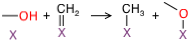

SurfaceArrheniusBEP(A=(7.124e+17,'m^2/(mol*s)'), n=0, alpha=0, E0=(1.63,'eV/molecule'), Tmin=(298,'K'), Tmax=(2000,'K'), comment="""From training reaction 34 used for Combined;VacantSite
Exact match found for rate rule [Combined;VacantSite]
Euclidian distance = 0
Multiplied by reaction path degeneracy 4.0
family: Surface_Dissociation_vdW""")


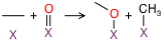

SurfaceArrheniusBEP(A=(7.124e+17,'m^2/(mol*s)'), n=0, alpha=0, E0=(1.63,'eV/molecule'), Tmin=(298,'K'), Tmax=(2000,'K'), comment="""From training reaction 34 used for Combined;VacantSite
Exact match found for rate rule [Combined;VacantSite]
Euclidian distance = 0
Multiplied by reaction path degeneracy 4.0
family: Surface_Dissociation_vdW""")


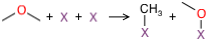

SurfaceArrheniusBEP(A=(7.124e+17,'m^2/(mol*s)'), n=0, alpha=0, E0=(1.63,'eV/molecule'), Tmin=(298,'K'), Tmax=(2000,'K'), comment="""From training reaction 34 used for Combined;VacantSite
Exact match found for rate rule [Combined;VacantSite]
Euclidian distance = 0
Multiplied by reaction path degeneracy 4.0
family: Surface_Dissociation_vdW""")


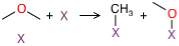

SurfaceArrheniusBEP(A=(7.124e+17,'m^2/(mol*s)'), n=0, alpha=0, E0=(1.63,'eV/molecule'), Tmin=(298,'K'), Tmax=(2000,'K'), comment="""From training reaction 34 used for Combined;VacantSite
Exact match found for rate rule [Combined;VacantSite]
Euclidian distance = 0
Multiplied by reaction path degeneracy 4.0
family: Surface_Dissociation_vdW""")


In [104]:
from rmgpy.rmg.model import get_family_library_object
for reaction in reaction_list: 
    display(reaction)
    # kin = database.kinetics.get_kinetics_for_template(reaction, degeneracy=1, method='rate rules')
    family = get_family_library_object(reaction.family)
    template = family.retrieve_template(reaction.template)
    # Get the kinetics for the reaction
    # kinetics, source, entry, is_forward = family.get_kinetics(reaction, template_labels=reaction.template,
    #                                                             degeneracy=reaction.degeneracy,
    #                                                             estimator="rate rules",
    #                                                             return_all_kinetics=False)


    family.get_kinetics_for_template(template, degeneracy=reaction.degeneracy, method='rate rules')
    
    print(kinetics)

rmgpy.species.Species